This notebook simply provides a quick plot of the bounded_sigmoid function, defined in the `operations.py` file, as a guide to how to select the shape, xmin and xmax parameters.


In [4]:
import numpy as np
from scipy import stats
%matplotlib inline

In [5]:
def bound_value(lb=None, ub=None):
    """
    builds a function that limits the range of a value
    """

    def _f(value):
        limited = max(lb, value)
        if ub is not None:
            limited = min(ub, limited)
        return limited

    return _f



def bounded_sigmoid(x_min, x_max, shape, incrementing=True):
    """
    Builds a S-shape curve that have y values evolving between 0 and 1 over
    the x domain [x_min, x_max]

    This is preferable to the logistic function for cases where we want to
    make sure that the curve actually reaches 0 and 1 at some point (e.g.
    probability of triggering an "restock" action must be 1 if stock is as
    low as 1).

    :param x_min: lower bound of the x domain
    :param x_max: lower bound of the x domain
    :param incrementing: if True, evolve from 0 to 1, or from 1 to 0 otherwise
    :param shape: strictly positive number controlling the shape of the
                  resulting function
                  * 1 correspond to linear transition
                  * higher values yield a more and more sharper, i.e. more
                    vertical S shape, converging towards a step function
                    transiting at (x_max-x_min)/2 for very large values of S (
                    e.g. 10000)
                  * values in ]0,1[ yield vertically shaped sigmoids, sharply
                    rising/falling at the boundary of the x domain and
                    transiting more smoothly in the middle of it.
    """

    bounded = bound_value(lb=x_min, ub=x_max)

    def f(x):
        # values outside the sigmoid are just the repetition of what's
        # happening at the boundaries
        x_b = bounded(x)

        if incrementing:
            return stats.beta.cdf((x_b - x_min) / (x_max - x_min),
                                   a=shape, b=shape)
        else:
            return stats.beta.sf((x_b - x_min) / (x_max - x_min),
                                  a=shape, b=shape)

    return np.frompyfunc(f, 1, 1)

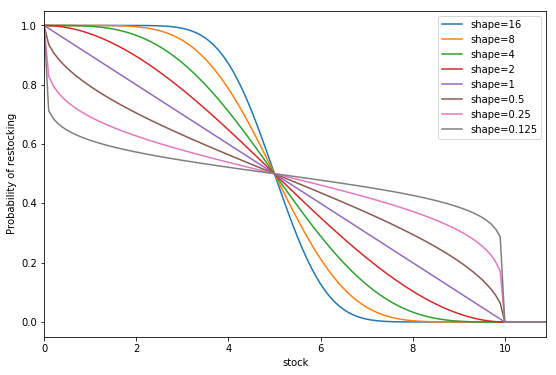

In [9]:

stock = np.arange(0,11,.1)
df = pd.DataFrame(index = pd.Series(stock, name="stock"))

for shape in [2**n for n in range(4, -4, -1)]:
    sig = bounded_sigmoid(0, 10, shape, incrementing=False)
    df["shape={}".format(shape)] = sig(df.index)

ax = df.plot(figsize=(9,6));
ax.set(ylabel="Probability of restocking");